# KNN Classification

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
url="https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"

In [4]:
iris=pd.read_csv(url)
iris.shape

(150, 5)

In [5]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [6]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


## EDA

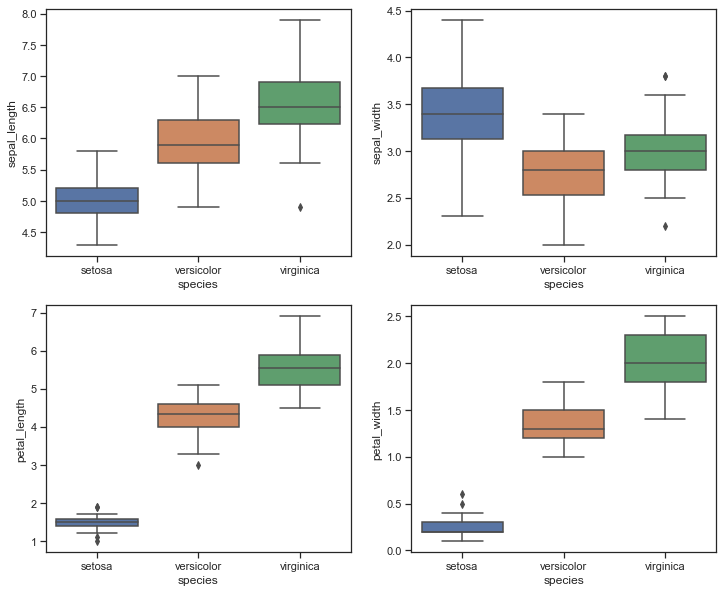

In [7]:
sns.set(style="ticks") 
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='species',y='sepal_length',data=iris)
plt.subplot(2,2,2)
sns.boxplot(x='species',y='sepal_width',data=iris)
plt.subplot(2,2,3)
sns.boxplot(x='species',y='petal_length',data=iris)
plt.subplot(2,2,4)
sns.boxplot(x='species',y='petal_width',data=iris)
plt.show()

In [8]:
iris[20:25]

,sepal_length,sepal_width,petal_length,petal_width,species
20,5.4,3.4,1.7,0.2,setosa
21,5.1,3.7,1.5,0.4,setosa
22,4.6,3.6,1.0,0.2,setosa
23,5.1,3.3,1.7,0.5,setosa
24,4.8,3.4,1.9,0.2,setosa


In [10]:
X=iris.drop(columns=['species'])
Y=iris['species']

from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=20)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_val)

array([[ 1.18652219, -0.53249156,  0.58615839,  0.27624394],
       [ 1.06524224,  0.17749719,  0.35852407,  0.27624394],
       [-1.11779688, -1.47914321, -0.26747033, -0.25414442],
       [ 0.21628258, -0.05916573,  0.58615839,  0.8066323 ],
       [-0.99651693,  0.88748593, -1.23491622, -1.04972696],
       [-1.11779688,  0.17749719, -1.29182481, -1.44751823],
       [-0.14755727, -1.00581738, -0.15365317, -0.25414442],
       [-0.14755727, -0.05916573,  0.2447069 ,  0.01104976],
       [ 0.45884248,  0.88748593,  0.92760988,  1.46961775],
       [ 0.70140238, -0.29582864,  0.30161548,  0.14364685],
       [ 0.33756253, -0.05916573,  0.64306697,  0.8066323 ],
       [ 0.58012243,  0.65082301,  0.52924981,  0.54143812],
       [ 1.67164199,  1.36081176,  1.32596996,  1.73481193],
       [-0.75395703,  0.88748593, -1.34873339, -1.31492114],
       [ 1.18652219, -0.05916573,  0.98451846,  1.20442357],
       [ 2.52060165,  1.83413758,  1.4966957 ,  1.07182648],
       [-0.99651693,  0.

## Model Training

In [12]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors =7)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [13]:
y_pred = classifier.predict(X_val)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_val, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_val,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Accuracy: 0.9666666666666667


## Hyperparameter Tuning

In [14]:
from sklearn import neighbors 
from sklearn.metrics import f1_score,confusion_matrix,roc_auc_score
f1_list=[]
k_list=[]
for k in range(1,10):
    clf=neighbors.KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    clf.fit(X_train,y_train)
    pred=clf.predict(X_val)
    f=f1_score(y_val,pred,average='macro')
    f1_list.append(f)
    k_list.append(k)

Text(0, 0.5, 'f1 score')

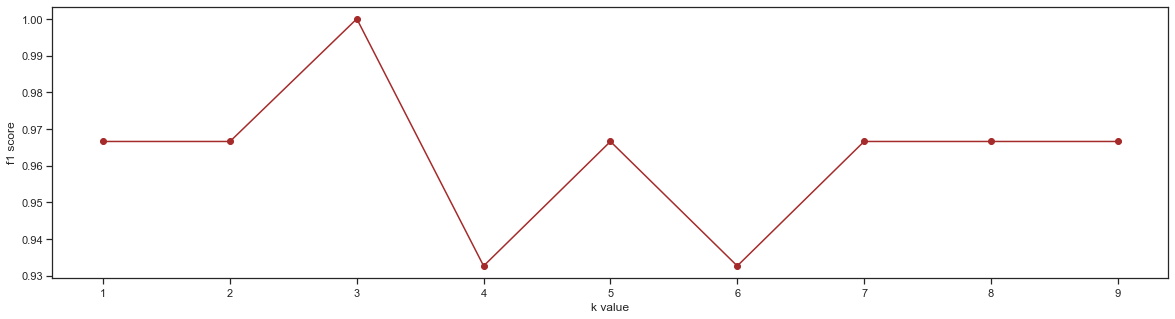

In [15]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,5))
plt.plot(k_list,f1_list,marker='o',color='brown')
plt.xlabel("k value")
plt.ylabel("f1 score")

In [16]:
best_f1_score=max(f1_list)
best_k=k_list[f1_list.index(best_f1_score)]        
print("Optimum K value=",best_k," with F1-Score=",best_f1_score)

Optimum K value= 3  with F1-Score= 1.0


## Performance Analysis

In [17]:
KNN_model=neighbors.KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
KNN_model.fit(X_train,y_train)
y_new_pred=KNN_model.predict(X_val)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
newresult = confusion_matrix(y_val, y_new_pred)
print("Confusion Matrix:")
print(newresult)
newresult1 = classification_report(y_val, y_new_pred)
print("Classification Report:",)
print (newresult1)
newresult2 = accuracy_score(y_val,y_new_pred)
print("Accuracy:",newresult2)

Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0


**Accuracy: 100%**